In [1]:
# data manipilation
import pandas as pd
import numpy as np

import json

# plot
import matplotlib.pyplot as plt

# functions
from functions.functions import *

In [2]:
# loading data
with open('data\wordsapi_sample.json') as json_file:
    data_lex = json.load(json_file)

with open("Data\wordle-nyt-allowed-guesses.txt", "r", newline="\n") as guess:
    data_guess = guess.read().splitlines()

with open("Data\wordle-nyt-answers-alphabetical.txt", "r", newline="\n") as awn:
    data_awn = awn.read().splitlines()

# create word list from dictionary entries
word_list = list(data_lex.keys())

In [3]:
lex_clean = by_size(word_list,5)

In [4]:
merge_list = lex_clean + data_guess + data_awn
print(len(merge_list))
clean_list = list(set(merge_list))
print(len(clean_list))

13928
13316


In [5]:
letter = count_letters(clean_list)

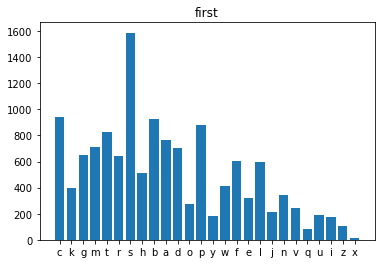

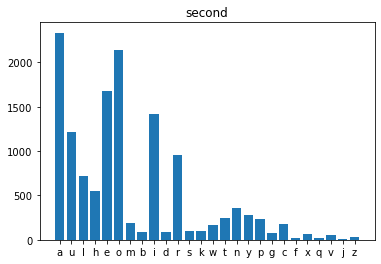

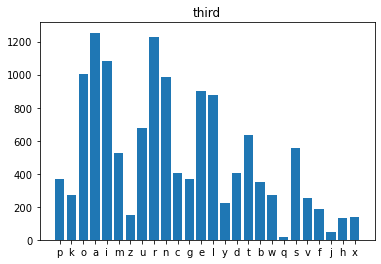

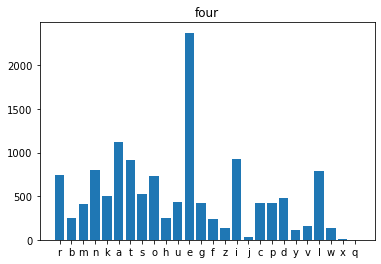

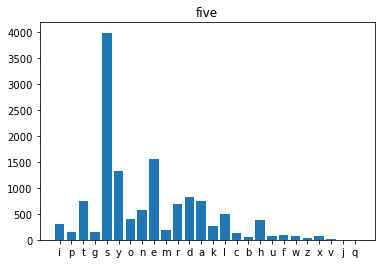

In [6]:
for p in letter:
    title_list = ["first","second","third","four","five"]
    plt.bar(list(letter[p].keys()), letter[p].values())
    plt.title(title_list[p])
    plt.show()

In [7]:
# Assigned values of letters to words from list
def rate_word(list_word,count_dict):
    output_long = dict()
    output_short = dict()
    for word in list_word:
        output_long[word] = dict()
        output_long[word]["count"] = 0
        output_short[word] = 0
        for key in count_dict:
            if  word[key] in output_long[word].keys():
                output_long[word]["count"] += 0
                output_short[word] += 0
            else:
                output_long[word][word[key]] = count_dict[key][word[key]]
                output_long[word]["count"] += count_dict[key][word[key]] 
                output_short[word] += count_dict[key][word[key]]
    return output_long, output_short




In [8]:
word_rated, word_begin = rate_word(clean_list,letter)
print(word_rated["cares"])
print(word_begin["cares"])
sorted(list(word_begin.values()), reverse= True)
list(word_begin.keys())[list(word_begin.values()).index(10862)]


{'count': 10862, 'c': 938, 'a': 2335, 'r': 1229, 'e': 2373, 's': 3987}
10862


'cares'

In [9]:
class Game:
    def __init__(self):
        self.line = 0
        self.first = ""
        self.second = ""
        self.third = ""
        self.fourth = ""
        self.five = ""

    
    
    def guess(self, string_guess):
        self.line += 1

        


In [10]:
correct = "black"

In [11]:
guess_1 = "cares"

In [12]:
in_let = [element for element in correct if element in guess_1]
wronng_let = [element for element in guess_1 if element not in correct] 

wronng_let

['r', 'e', 's']

In [94]:
in_let = {"c":0,"a":1}
correct_let = dict()
worng_let = ["r","e","s"]

In [95]:
len(clean_list)

13316

In [140]:
filter_correct = []
for l in in_let.keys():
    if len(filter_correct) == 0:
        filter_correct = [i for i in clean_list if l in i]
    else:
        cache = [i for i in clean_list if l in i]
        filter_correct = [element for element in filter_correct if element in cache]

list_2 = []
for l in range(len(worng_let)):
    if len(list_2) == 0:
        list_2 = [i for i in filter_correct if worng_let[l] not in i]
    else:
        cache = [i for i in filter_correct if worng_let[l] not in i]
        list_2 = [element for element in list_2 if element in cache]

len(list_2), list_2[:5]
type(sorted(list_2))

list

In [141]:
list_2 = sorted(list_2)
proof = len(list_2)-1

while len(list_2) != proof:
    print(len(list_2))
    proof = len(list_2)
    for letter in in_let.keys():
        # print(letter)
        for word in list_2:
            # if word == "chang":
            #     print("Fuck")
            if in_let[letter] == word.index(letter):
                list_2.remove(word)

        

    
        
# len(list_2)
# len(list_h2)
# if word == "batch":
#     print("Fuck")


254
150
107
87
82
80
79
78


In [142]:
for word in list_2:
    # if word == "batch":
    #     print("Fuck")
    for letter in in_let.keys():
        # print(letter)
        if word.index(letter) == in_let[letter]:
            print(word.index(letter),word)
            if word in list_2:
                list_2.remove(word)
            
        
len(list_2)

78

In [143]:
"panic" in list_2

False

In [144]:
"black" in list_2 #56 #58

True

In [145]:
letter_rate_2 = count_letters(list_2)

In [146]:
l, s = rate_word(list_2,letter_rate_2)

In [147]:
number = sorted(list(s.values()), reverse= True)[0]
list(s.keys())[list(s.values()).index(number)]

'aitch'

In [148]:
l["aitch"]

{'count': 87, 'a': 26, 'i': 14, 't': 9, 'c': 33, 'h': 5}

In [149]:
"cares".index("a")

1

In [151]:
c = {"a", "c"}

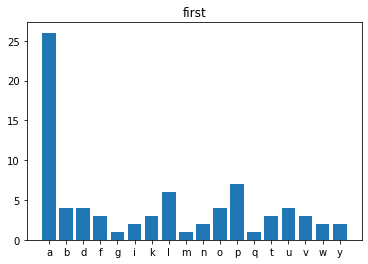

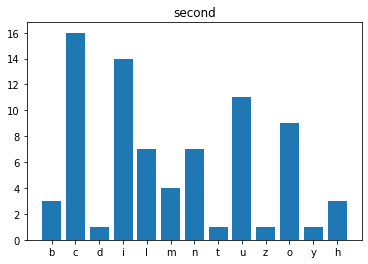

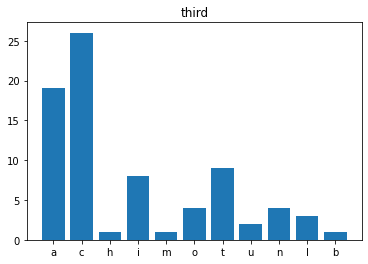

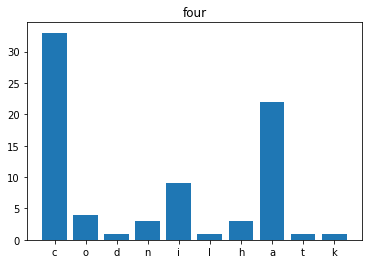

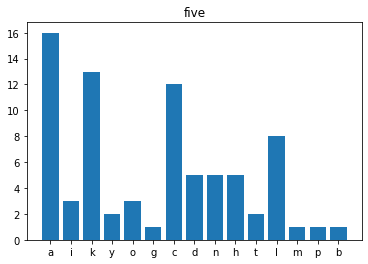

In [152]:
for p in letter_rate_2:
    title_list = ["first","second","third","four","five"]
    plt.bar(list(letter_rate_2[p].keys()), letter_rate_2[p].values())
    plt.title(title_list[p])
    plt.show()